In [1]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from keras.utils  import to_categorical
import tensorflow as tf
import pickle

In [2]:
def load_rottenvsfresh():
    quality=['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('train')):
        if quality[0] in cata:
            path_main=os.path.join('train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        elif quality[1] in cata:
            path_main=os.path.join('train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
        elif quality[2] in cata:
            path_main=os.path.join('train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,2])
        elif quality[3] in cata:
            path_main=os.path.join('train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,3])
        elif quality[4] in cata:
            path_main=os.path.join('train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,4])
        else:
            path_main=os.path.join('train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,5])
    print('Shuffling data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [3]:
X,Y=load_rottenvsfresh()

100%|████████████████████████████████████████████████████████████████████████| 10920/10920 [00:00<00:00, 285239.73it/s]

Shuffling data.....


In [4]:
from collections import Counter
Y=np.array(Y)
X=np.array(X)
newData = Counter(Y)
most_fruits = newData.most_common(6)
most_fruits

[(3, 2342), (4, 2224), (0, 1693), (5, 1595), (1, 1584), (2, 1482)]

In [5]:
X.shape

(10920, 100, 100, 3)

In [6]:
def load_rottenvsfresh_test_valset():
    quality=['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('test')):
        if quality[0] in cata:
            path_main=os.path.join('test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        elif quality[1] in cata:
            path_main=os.path.join('test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
        elif quality[2] in cata:
            path_main=os.path.join('test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,2])
        elif quality[3] in cata:
            path_main=os.path.join('test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,3])
        elif quality[4] in cata:
            path_main=os.path.join('test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,4])
        else:
            path_main=os.path.join('test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,5])
    print('Shuffling data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [7]:
X_val,Y_val=load_rottenvsfresh_test_valset()

100%|██████████████████████████████████████████████████████████████████████████| 2698/2698 [00:00<00:00, 678838.16it/s]

Shuffling data.....


In [8]:
from sklearn.model_selection import train_test_split
X_val, X_test, Y_val, Y_test = train_test_split(X_val,Y_val, test_size=0.5, random_state=42)

In [9]:
Y_val=np.array(Y_val)
X_val=np.array(X_val)
newData = Counter(Y_val)
most_fruits = newData.most_common(6)
most_fruits

[(3, 307), (4, 265), (5, 209), (0, 198), (2, 190), (1, 180)]

In [10]:
Y_test=np.array(Y_test)
X_test=np.array(X_test)
newData = Counter(Y_test)
most_fruits = newData.most_common(6)
most_fruits

[(3, 294), (4, 265), (1, 201), (2, 198), (0, 197), (5, 194)]

In [11]:
X_val.shape

(1349, 100, 100, 3)

In [12]:
X_test.shape

(1349, 100, 100, 3)

In [13]:
X=X/255.0
X_val=X_val/255.0
X_test=X_test/255.0

In [14]:
Y=to_categorical(Y)
Y_val=to_categorical(Y_val)
Y_test=to_categorical(Y_test)

In [15]:
Y.shape, Y_val.shape, Y_test.shape

((10920, 6), (1349, 6), (1349, 6))

In [16]:
import keras 
from keras.layers import Dense,Dropout, Conv2D,MaxPooling2D , Activation, Flatten, BatchNormalization, SeparableConv2D
from keras.models import Sequential

In [17]:
model = Sequential()

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu', input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(SeparableConv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 32)      128       
_________________________________________________________________
separable_conv2d (SeparableC (None, 100, 100, 64)      2400      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 64)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 50, 50, 128)       8896      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 128)       5

In [18]:
lr_rate=keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=6, verbose=1, mode='max',
    min_lr=0.00002, cooldown=2)
check_point=tf.keras.callbacks.ModelCheckpoint(
    filepath='fruit_v2_1.h5', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min')

In [19]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(lr = 0.001), metrics=['accuracy'])

In [20]:
history=model.fit(X,Y,batch_size=20,validation_data=(X_val,Y_val),epochs= 50,
                 callbacks=[check_point])

Epoch 1/50
546/546 [==============================] - 401s 478ms/step - loss: 1.6328 - accuracy: 0.6223 - val_loss: 0.5526 - val_accuracy: 0.8606

Epoch 00001: val_loss improved from inf to 0.55260, saving model to fruit_v2_1.h5
Epoch 2/50
546/546 [==============================] - 183s 335ms/step - loss: 0.3714 - accuracy: 0.8688 - val_loss: 0.6420 - val_accuracy: 0.8273

Epoch 00002: val_loss did not improve from 0.55260
Epoch 3/50
546/546 [==============================] - 181s 332ms/step - loss: 0.3337 - accuracy: 0.8883 - val_loss: 0.2419 - val_accuracy: 0.9118

Epoch 00003: val_loss improved from 0.55260 to 0.24187, saving model to fruit_v2_1.h5
Epoch 4/50
546/546 [==============================] - 183s 336ms/step - loss: 0.2512 - accuracy: 0.9131 - val_loss: 0.4083 - val_accuracy: 0.8910

Epoch 00004: val_loss did not improve from 0.24187
Epoch 5/50
546/546 [==============================] - 185s 338ms/step - loss: 0.2054 - accuracy: 0.9302 - val_loss: 0.3720 - val_accuracy: 0.8

546/546 [==============================] - 168s 307ms/step - loss: 0.0862 - accuracy: 0.9813 - val_loss: 0.1195 - val_accuracy: 0.9755

Epoch 00041: val_loss did not improve from 0.05487
Epoch 42/50
546/546 [==============================] - 176s 322ms/step - loss: 0.0772 - accuracy: 0.9840 - val_loss: 0.1247 - val_accuracy: 0.9718

Epoch 00042: val_loss did not improve from 0.05487
Epoch 43/50
546/546 [==============================] - 176s 322ms/step - loss: 0.0755 - accuracy: 0.9834 - val_loss: 0.1888 - val_accuracy: 0.9644

Epoch 00043: val_loss did not improve from 0.05487
Epoch 44/50
546/546 [==============================] - 180s 330ms/step - loss: 0.1277 - accuracy: 0.9745 - val_loss: 0.1158 - val_accuracy: 0.9800

Epoch 00044: val_loss did not improve from 0.05487
Epoch 45/50
546/546 [==============================] - 181s 332ms/step - loss: 0.0694 - accuracy: 0.9829 - val_loss: 0.1873 - val_accuracy: 0.9696

Epoch 00045: val_loss did not improve from 0.05487
Epoch 46/50
546/5

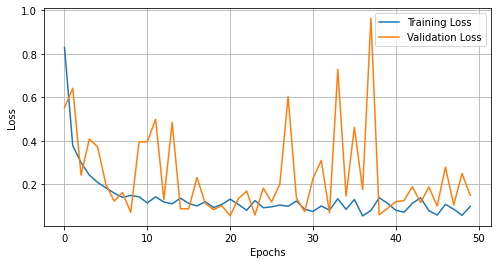

In [21]:
plt.figure(1, figsize = (8, 4))
plt.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

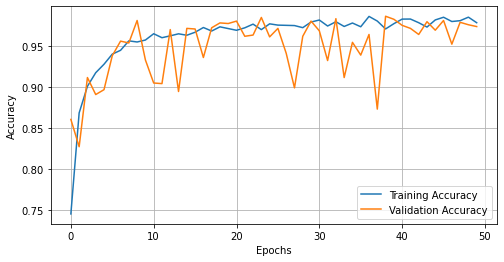

In [22]:
plt.figure(1, figsize = (8, 4))
plt.plot()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [23]:
model.evaluate(X_test,Y_test)

43/43 [==============================] - 6s 115ms/step - loss: 0.1532 - accuracy: 0.9652


[0.15319384634494781, 0.9651593565940857]

In [24]:
model.save('fruit_classification_p1.h5')

In [25]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from keras.utils  import to_categorical 
import pickle
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [26]:
from keras import models
model = models.load_model('fruit_v2_1.h5')

In [27]:
model.evaluate(X_test,Y_test)

43/43 [==============================] - 6s 95ms/step - loss: 0.1042 - accuracy: 0.9755


[0.10419470071792603, 0.9755374193191528]

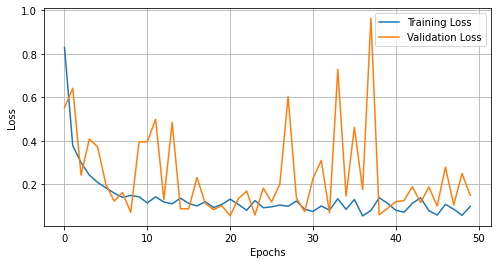

In [28]:
plt.figure(1, figsize = (8, 4))
plt.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

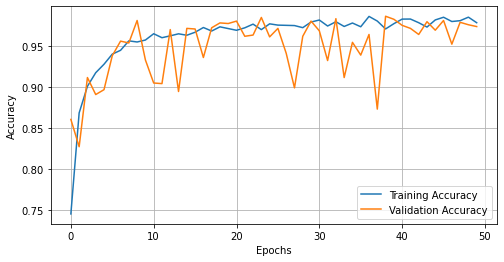

In [29]:
plt.figure(1, figsize = (8, 4))
plt.plot()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [30]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
conf = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
print('Confusion Matrix\n')
print(conf)

Confusion Matrix

[[192   0   1   3   0   1]
 [  1 196   0   4   0   0]
 [  0   0 193   1   2   2]
 [  4   0   2 288   0   0]
 [  0   1   0   0 264   0]
 [  0   0   1  10   0 183]]


In [31]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1))))

print('Micro Precision: {:.2f}'.format(precision_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1), average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1), average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1), average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')))


Accuracy: 0.98

Micro Precision: 0.98
Micro Recall: 0.98
Micro F1-score: 0.98

Macro Precision: 0.98
Macro Recall: 0.97
Macro F1-score: 0.98

Weighted Precision: 0.98
Weighted Recall: 0.98
Weighted F1-score: 0.98


In [33]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=['Fresh Apple', 'Fresh Banana', 'Fresh Orange', 'Rotten Apple', 'Rotten Banana', 'Rotten Orange']))


Classification Report

               precision    recall  f1-score   support

  Fresh Apple       0.97      0.97      0.97       197
 Fresh Banana       0.99      0.98      0.98       201
 Fresh Orange       0.98      0.97      0.98       198
 Rotten Apple       0.94      0.98      0.96       294
Rotten Banana       0.99      1.00      0.99       265
Rotten Orange       0.98      0.94      0.96       194

     accuracy                           0.98      1349
    macro avg       0.98      0.97      0.98      1349
 weighted avg       0.98      0.98      0.98      1349

